<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/titanic_%EC%83%9D%EC%A1%B4%EC%9C%A8%EC%98%88%EC%B8%A1_%EC%88%98%EC%B9%98%EA%B0%92%EC%9C%BC%EB%A1%9C%EB%A7%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
raw_data= sns.load_dataset('titanic')
print(raw_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
print(raw_data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
clean_data= raw_data.dropna(axis=1, thresh=500)   #컬럼기준으로 넌값 500개이상인거 지우겠다
print(clean_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [ ]:
mean_age= clean_data['age'].mean()
print(mean_age)

29.69911764705882


In [ ]:
clean_data['age'].fillna(mean_age, inplace=True)
print(clean_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
clean_data.drop(['embark_town', 'alive', 'who'], axis=1, inplace=True)   #sex랑 중복되니까 who도 삭제

In [ ]:
print(clean_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

   adult_male  alone  
0        True  False  
1       False  False  
2       False   True  
3       False  False  
4        True   True  


In [ ]:
clean_data['embarked'].fillna(
    method='ffill', inplace=True
)
print(clean_data.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
adult_male    0
alone         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   adult_male  891 non-null    bool    
 10  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(2)
memory usage: 58.6+ KB
None


In [ ]:
label = list(clean_data.columns)
keep= label.pop(0)  #0번껄 빼옴
target = clean_data[[keep]]   #생존값 즉 결과 정답값. 타겟값.
training_data = clean_data[label]  #다른 요인값들
print(training_data.head())
print(target.head())



   pclass     sex   age  sibsp  parch     fare embarked  class  adult_male  \
0       3    male  22.0      1      0   7.2500        S  Third        True   
1       1  female  38.0      1      0  71.2833        C  First       False   
2       3  female  26.0      0      0   7.9250        S  Third       False   
3       1  female  35.0      1      0  53.1000        S  First       False   
4       3    male  35.0      0      0   8.0500        S  Third        True   

   alone  
0  False  
1  False  
2   True  
3  False  
4   True  
   survived
0         0
1         1
2         1
3         1
4         0


In [ ]:
print(training_data.info())
print(clean_data.info())
print(training_data['class'])
print(training_data['sex'])
print(training_data['embarked'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      891 non-null    int64   
 1   sex         891 non-null    object  
 2   age         891 non-null    float64 
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   embarked    891 non-null    object  
 7   class       891 non-null    category
 8   adult_male  891 non-null    bool    
 9   alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(2)
memory usage: 51.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-nul

In [ ]:
# who 삭제
#training_data.drop(['who'], axis=1, inplace=True)
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      891 non-null    int64   
 1   sex         891 non-null    object  
 2   age         891 non-null    float64 
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   embarked    891 non-null    object  
 7   class       891 non-null    category
 8   adult_male  891 non-null    bool    
 9   alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(2)
memory usage: 51.6+ KB
None


# 원핫인코더를 안 쓰고 진행하기 위해 숫자가 아닌 범주 값들을, 숫자로 바꾼다.
# 원핫인코딩을 한다면 범주값들이 원핫인코딩 데이터가 됐었다.

In [ ]:
training_data['sex'].replace({'male':0, 'female':1}, inplace=True)
training_data['class'].replace({'First':0, 'Second':1, 'Third':2}, inplace=True)
training_data['embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# print(training_data.info())
# training_data.drop(['who'], axis=1, inplace=True)
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   embarked    891 non-null    int64  
 7   class       891 non-null    int64  
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB
None


# 모든 값이 수치화됐고, 그것들을 스케일링한다.

In [ ]:
from sklearn.preprocessing import StandardScaler
# column_name = list(clean_data.columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)   #평균0 표준편차1인 정규분포 따르는 데이터로 바뀜.
#training data를 스케일링, 트레이닝 데이터가 입력값임. 결과값 뺀 입력값.
print(type(scaled_data))  #ndarray니까 바꿔줘야함
 #이전에 라벨로 컬럼명리스트 썼었는데 이거 컬럼네임에 넣어줌
scaled_data= pd.DataFrame(scaled_data, columns=label)
print(scaled_data.head())   #평균0 표준편차1인 정규분포 따르는 데이터를 가지는 df객체로 바뀜.
print(scaled_data.shape)
print(target.shape)


<class 'numpy.ndarray'>
     pclass       sex       age     sibsp     parch      fare  embarked  \
0  0.827377 -0.737695 -0.592481  0.432793 -0.473674 -0.502445 -0.571898   
1 -1.566107  1.355574  0.638789  0.432793 -0.473674  0.786845  0.995982   
2  0.827377  1.355574 -0.284663 -0.474545 -0.473674 -0.488854 -0.571898   
3 -1.566107  1.355574  0.407926  0.432793 -0.473674  0.420730 -0.571898   
4  0.827377 -0.737695  0.407926 -0.474545 -0.473674 -0.486337 -0.571898   

      class  adult_male     alone  
0  0.827377    0.811922 -1.231645  
1 -1.566107   -1.231645 -1.231645  
2  0.827377   -1.231645  0.811922  
3 -1.566107   -1.231645 -1.231645  
4  0.827377    0.811922  0.811922  
(891, 10)
(891, 1)


# scaled_data(입력값)와 target(출력값)을  학습용과 검증용으로 나눈다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
# scaled_data.boxplot(column=label, showmeans=True)  #df에 boxplot하면 그려짐
# plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target, test_size=0.3 )         #입력데이터, 출력데이터, 검증용 30프로로 나눠라
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)



X_train: (623, 10)
X_test: (268, 10)
Y_train: (623, 1)
Y_test: (268, 1)


# 모델 만들고, 모델 학습시키고, 검증하고, 평가한다

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

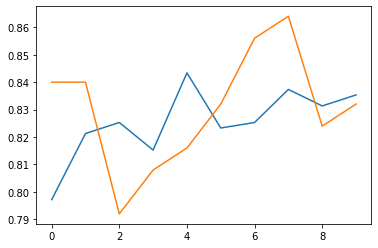

keras DNN model loss : 0.14038102328777313
keras DNN model accuracy: 0.8097015023231506


In [ ]:


model = Sequential()
model.add(Dense(512, input_dim=10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  #맨마지막은 퍼셈트론 1개고 활성화함수는 시그모이드로 하면되지 분류니까0이냐 1이냐만 보면 되니까
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size= 10, epochs=10, validation_split= 0.2, verbose=1)

plt.plot(fit_hist.history['binary_accuracy'])   #테스트용 70 중 80퍼 가지고 구한 학습정확도. loss 계산으로.. 근데 분류할때는 loss는 상관없지. 정확도만 보면됨.
                                        #이진분류가 얼마나 잘 됐는지.

plt.plot(fit_hist.history['val_binary_accuracy'])  #이거는 검증정확도임.  검증정확도는 낮아지네?  과적합이 일어났다는 거임.
plt.show()


score= model.evaluate(X_test, Y_test, verbose=0)   #검증할 거임   #X가 입력 Y가 타겟. 
#이때는 forward만 가서 mse, 정확도만 구함.  테스트셋에 대한 학습은 x.
print('keras DNN model loss :', score[0])
print('keras DNN model accuracy:', score[1])